In [566]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

In [567]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###1. Data Understanding and Exploration
Let's first have a look at the dataset and understand fields.

In [568]:
house_data = pd.read_csv('drive/MyDrive/Samples/AR - Submission/train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [569]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###Non-Null values
Alley - 91 - less than 10%

FireplaceQu - 770 - 50%

PoolQC - 7 - less than 1%

Fence - 281 - less than 20%

MiscFeature - 54 - less than 5%

Above columns has highest number of null values. These doesn't help us in analysis of the data. So, we can delete these values.

In [570]:
house_data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [571]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


###Lets check if any column has a single value for most of the rows.

From below observation we didnt find any such columns.

In [572]:
house_data.var()

Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea  

In [573]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [574]:
house_data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [575]:
house_data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [576]:
house_data.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [577]:
house_data.PoolArea.value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [578]:
house_data.ScreenPorch.value_counts()

0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64

In [579]:
house_data['3SsnPorch'].value_counts()

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

In [580]:
house_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [581]:
house_data.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [582]:
house_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [583]:
house_data.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [584]:
house_data.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [585]:
house_data.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [586]:
house_data.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [587]:
house_data.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [588]:
house_data.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [589]:
house_data.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [590]:
house_data.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [591]:
with pd.option_context('display.max_rows', 10000):
  print(house_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [592]:
house_data.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [593]:
house_data.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [594]:
house_data.EnclosedPorch.value_counts()

0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64

In [595]:
house_data.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [596]:
house_data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [597]:
house_data.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [598]:
house_data.BsmtFinSF2.value_counts()

0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64

In [599]:
house_data.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [600]:
house_data.drop(['3SsnPorch','ScreenPorch','PoolArea','MiscVal','SaleCondition','SaleType','Id','Utilities','Street','LandContour','Condition1','Condition2','RoofStyle','RoofMatl','BsmtHalfBath','KitchenAbvGr','GarageCars','GarageCond','GarageQual','PavedDrive','EnclosedPorch','Electrical','BsmtFinType2','BsmtFinSF2','Heating'],axis=1,inplace=True)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LotConfig     1460 non-null   object 
 6   LandSlope     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   BldgType      1460 non-null   object 
 9   HouseStyle    1460 non-null   object 
 10  OverallQual   1460 non-null   int64  
 11  OverallCond   1460 non-null   int64  
 12  YearBuilt     1460 non-null   int64  
 13  YearRemodAdd  1460 non-null   int64  
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  MasVnrType    1452 non-null   object 
 17  MasVnrArea    1452 non-null   float64
 18  ExterQual     1460 non-null 

In [601]:
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,Gtl,CollgCr,1Fam,2Story,...,0,Attchd,2003.0,RFn,548,0,61,2,2008,208500
1,20,RL,80.0,9600,Reg,FR2,Gtl,Veenker,1Fam,1Story,...,1,Attchd,1976.0,RFn,460,298,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,Gtl,CollgCr,1Fam,2Story,...,1,Attchd,2001.0,RFn,608,0,42,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Gtl,Crawfor,1Fam,2Story,...,1,Detchd,1998.0,Unf,642,0,35,2,2006,140000
4,60,RL,84.0,14260,IR1,FR2,Gtl,NoRidge,1Fam,2Story,...,1,Attchd,2000.0,RFn,836,192,84,12,2008,250000


In [602]:
house_data['GarageType'].fillna('NoGarage',inplace=True)

In [603]:
house_data['GarageFinish'].fillna('NoGarage',inplace=True)

In [604]:
house_data['GarageYrBlt'].fillna(0,inplace=True)

In [605]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LotConfig     1460 non-null   object 
 6   LandSlope     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   BldgType      1460 non-null   object 
 9   HouseStyle    1460 non-null   object 
 10  OverallQual   1460 non-null   int64  
 11  OverallCond   1460 non-null   int64  
 12  YearBuilt     1460 non-null   int64  
 13  YearRemodAdd  1460 non-null   int64  
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  MasVnrType    1452 non-null   object 
 17  MasVnrArea    1452 non-null   float64
 18  ExterQual     1460 non-null 

In [606]:
house_data.LotFrontage.fillna(0,inplace=True)

In [607]:
house_data.MasVnrType.fillna('None',inplace=True)

In [608]:
house_data.MasVnrArea.fillna(0,inplace=True)

In [609]:
house_data[['BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1']][house_data.BsmtCond.isna()]

,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1
17,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN


In [610]:
house_data.BsmtCond.fillna('NoBsmt',inplace=True)
house_data.BsmtQual.fillna('NoBsmt',inplace=True)
house_data.BsmtExposure.fillna('NoBsmt',inplace=True)
house_data.BsmtFinType1.fillna('NoBsmt',inplace=True)

In [611]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LotConfig     1460 non-null   object 
 6   LandSlope     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   BldgType      1460 non-null   object 
 9   HouseStyle    1460 non-null   object 
 10  OverallQual   1460 non-null   int64  
 11  OverallCond   1460 non-null   int64  
 12  YearBuilt     1460 non-null   int64  
 13  YearRemodAdd  1460 non-null   int64  
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  MasVnrType    1460 non-null   object 
 17  MasVnrArea    1460 non-null   float64
 18  ExterQual     1460 non-null 

In [612]:
house_data.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [613]:
house_data.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [614]:
house_data.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

##Now lets get all the numeric fields to see the pairplot

In [615]:
house_data_numeric = house_data.select_dtypes(include=['float64', 'int64'])
house_data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,3,8,0,2003.0,548,0,61,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,3,6,1,1976.0,460,298,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,3,6,1,2001.0,608,0,42,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,3,7,1,1998.0,642,0,35,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,4,9,1,2000.0,836,192,84,12,2008,250000


MSSubClass, OverallCond & OverallQual are numeric columns but we should treat them as categorical.

In [616]:
house_data_numeric = house_data_numeric.drop(['MSSubClass','OverallCond','OverallQual'], axis=1)
house_data_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,150,856,856,854,...,3,8,0,2003.0,548,0,61,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,284,1262,1262,0,...,3,6,1,1976.0,460,298,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,434,920,920,866,...,3,6,1,2001.0,608,0,42,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,540,756,961,756,...,3,7,1,1998.0,642,0,35,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,490,1145,1145,1053,...,4,9,1,2000.0,836,192,84,12,2008,250000


In [617]:
#house_data_numeric = house_data_numeric.drop(['MSSubClass','OverallCond','OverallQual','YearBuilt','YearRemodAdd','YrSold','MoSold','GarageYrBlt'], axis=1)
#house_data_numeric.head()

##Correlation Matrix

In [618]:
# correlation matrix
cor = house_data_numeric.corr()
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.100739,0.036853,0.078686,0.105010,0.076670,0.160829,0.238274,0.245181,0.042549,...,0.144494,0.221396,0.044018,0.019317,0.201473,-0.016780,0.069605,0.018942,-0.012094,0.209624
LotArea,0.100739,1.000000,0.014228,0.013788,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,...,0.119690,0.190015,0.271364,0.072599,0.180403,0.171698,0.084774,0.001205,-0.014261,0.263843
YearBuilt,0.036853,0.014228,1.000000,0.592855,0.311600,0.249503,0.149040,0.391452,0.281986,0.010308,...,-0.070651,0.095589,0.147716,0.272029,0.478954,0.224880,0.188686,0.012398,-0.013618,0.522897
YearRemodAdd,0.078686,0.013788,0.592855,1.000000,0.176529,0.128451,0.181133,0.291066,0.240379,0.140024,...,-0.040581,0.191740,0.112581,0.146357,0.371600,0.205726,0.226298,0.021490,0.035743,0.507101
MasVnrArea,0.105010,0.103321,0.311600,0.176529,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,...,0.102775,0.279568,0.247015,0.132696,0.370884,0.159991,0.122528,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.076670,0.214103,0.249503,0.128451,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,...,-0.107355,0.044316,0.260011,0.115843,0.296970,0.204306,0.111761,-0.015727,0.014359,0.386420
BsmtUnfSF,0.160829,-0.002618,0.149040,0.181133,0.113862,-0.495251,1.000000,0.415360,0.317987,0.004469,...,0.166643,0.250647,0.051575,0.042720,0.183303,-0.005316,0.129005,0.034888,-0.041258,0.214479
TotalBsmtSF,0.238274,0.260833,0.391452,0.291066,0.360067,0.522396,0.415360,1.000000,0.819530,-0.174512,...,0.050450,0.285573,0.339519,0.176359,0.486665,0.232019,0.247264,0.013196,-0.014969,0.613581
1stFlrSF,0.245181,0.299475,0.281986,0.240379,0.339850,0.445863,0.317987,0.819530,1.000000,-0.202646,...,0.127401,0.409516,0.410531,0.166642,0.489782,0.235459,0.211671,0.031372,-0.013604,0.605852
2ndFlrSF,0.042549,0.050986,0.010308,0.140024,0.173800,-0.137079,0.004469,-0.174512,-0.202646,1.000000,...,0.502901,0.616423,0.194561,0.064402,0.138347,0.092165,0.208026,0.035164,-0.028700,0.319334


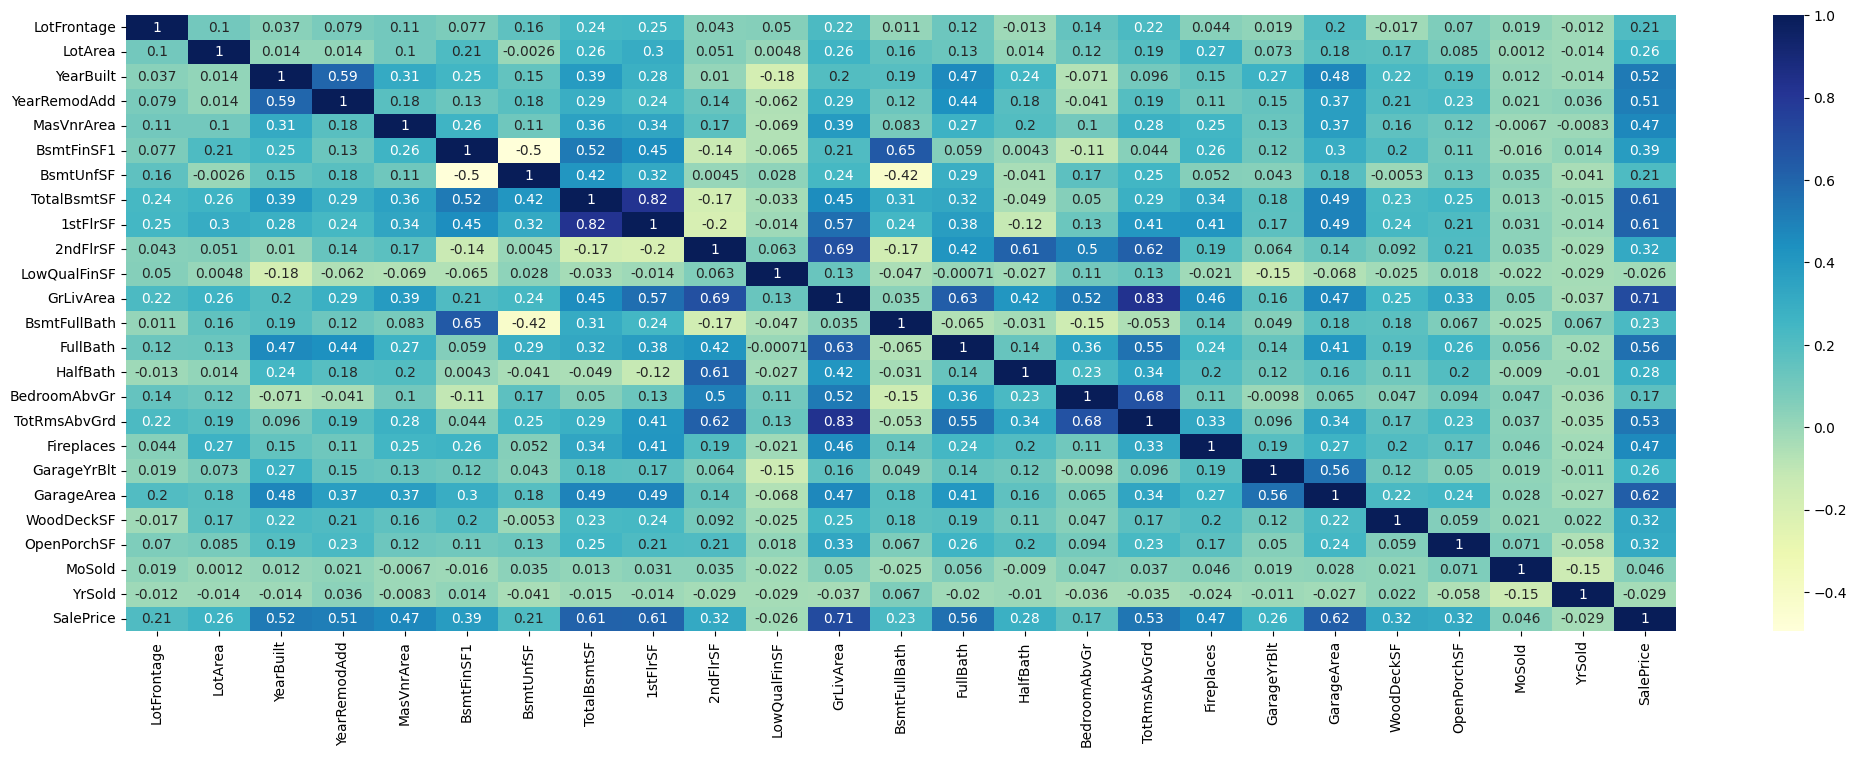

In [619]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


SalePrice is positively correlated with below variables :
          TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageArea,YearBuilt

There are no variables which affect the SalePrice significantly negative.

We can see lot of independant varaibles are dependent on each other. This causes multi colleanearity.
  

##Data Cleaning


'MSSubClass','OverallCond','OverallQual','GarageYrBlt'

In [620]:
house_data.MSSubClass.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSSubClass
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [621]:
house_data.MSSubClass = house_data.MSSubClass.astype('object')

In [622]:
house_data.OverallCond = house_data.OverallCond.astype('object')

In [623]:
house_data.OverallQual = house_data.OverallQual.astype('object')

In [624]:
house_data.YearBuilt.value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

In [625]:
house_data.GarageYrBlt.value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

GarageYrBlt has too many values and we can remove this column

In [626]:
house_data.drop('GarageYrBlt',axis=1,inplace=True)

Define a column Age which id difference between

In [627]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   object 
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LotConfig     1460 non-null   object 
 6   LandSlope     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   BldgType      1460 non-null   object 
 9   HouseStyle    1460 non-null   object 
 10  OverallQual   1460 non-null   object 
 11  OverallCond   1460 non-null   object 
 12  YearBuilt     1460 non-null   int64  
 13  YearRemodAdd  1460 non-null   int64  
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  MasVnrType    1460 non-null   object 
 17  MasVnrArea    1460 non-null   float64
 18  ExterQual     1460 non-null 

##Data Preparation

Split into X and y

In [628]:
X = house_data.drop('SalePrice',axis=1)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,...,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,60,RL,65.0,8450,Reg,Inside,Gtl,CollgCr,1Fam,2Story,...,8,Typ,0,Attchd,RFn,548,0,61,2,2008
1,20,RL,80.0,9600,Reg,FR2,Gtl,Veenker,1Fam,1Story,...,6,Typ,1,Attchd,RFn,460,298,0,5,2007
2,60,RL,68.0,11250,IR1,Inside,Gtl,CollgCr,1Fam,2Story,...,6,Typ,1,Attchd,RFn,608,0,42,9,2008
3,70,RL,60.0,9550,IR1,Corner,Gtl,Crawfor,1Fam,2Story,...,7,Typ,1,Detchd,Unf,642,0,35,2,2006
4,60,RL,84.0,14260,IR1,FR2,Gtl,NoRidge,1Fam,2Story,...,9,Typ,1,Attchd,RFn,836,192,84,12,2008


In [629]:
y = house_data['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [630]:
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,LotShape,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,Functional,GarageType,GarageFinish
0,60,RL,Reg,Inside,Gtl,CollgCr,1Fam,2Story,7,5,...,Gd,TA,No,GLQ,Ex,Y,Gd,Typ,Attchd,RFn
1,20,RL,Reg,FR2,Gtl,Veenker,1Fam,1Story,6,8,...,Gd,TA,Gd,ALQ,Ex,Y,TA,Typ,Attchd,RFn
2,60,RL,IR1,Inside,Gtl,CollgCr,1Fam,2Story,7,5,...,Gd,TA,Mn,GLQ,Ex,Y,Gd,Typ,Attchd,RFn
3,70,RL,IR1,Corner,Gtl,Crawfor,1Fam,2Story,7,5,...,TA,Gd,No,ALQ,Gd,Y,Gd,Typ,Detchd,Unf
4,60,RL,IR1,FR2,Gtl,NoRidge,1Fam,2Story,8,5,...,Gd,TA,Av,GLQ,Ex,Y,Gd,Typ,Attchd,RFn


In [631]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [632]:
# drop categorical variables
X = X.drop(list(house_categorical.columns), axis=1)

In [633]:
# Add dummies to X
X = pd.concat([X, house_dummies], axis=1)

In [634]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'Functional_Typ', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NoGarage', 'GarageFinish_NoGarage', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=187)

In [635]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

##Model Building and Evaluation

###Linear Regression

In [636]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [637]:
print(lm.intercept_)
print(lm.coef_)

176376238822775.8
[-2.17680379e+03  4.26678680e+03  5.11622941e+03  3.27401742e+03
  1.84156681e+03 -3.28897335e+03  8.45028146e+02 -4.56495621e+02
  1.99542500e+16  2.25320068e+16  2.50974624e+15 -2.71233821e+16
  4.44981050e+03  5.41352165e+03  2.43480820e+03 -3.86002124e+02
  1.77418688e+03  2.63273393e+03  5.31809088e+03  1.27687889e+03
 -1.31033011e+03 -1.42943885e+02 -1.61242117e+03 -6.67519785e+02
 -1.13609218e+02 -8.46210677e+02  2.71881738e+03 -5.69495343e+02
  1.32344507e+03  1.39060058e+03  6.55058132e+01 -9.48160543e+02
 -4.60291737e+15 -3.00150000e+03 -3.51000000e+02 -1.15050000e+03
 -3.06852592e+16  4.58912500e+03  2.38787500e+03  1.10817500e+04
  1.04300000e+04  6.93250000e+02 -2.04275000e+03  1.47287500e+03
  2.35056250e+03 -2.38700000e+03 -8.06500000e+02  7.00000000e+00
  5.07000000e+02 -1.01500000e+02 -4.84500000e+02 -2.28250000e+02
 -2.59000000e+02  8.30750000e+02  8.09000000e+02  5.28237500e+03
 -4.85763281e+03  1.90350000e+03 -1.38300000e+03 -1.95150000e+03
 -1.544

In [638]:
from sklearn.metrics import r2_score, mean_squared_error

In [639]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8925891780445493
-1.6766037867777327e+22
685356102701.9893
4.725864102223191e+34
671259650.0509199
1.0789644069002719e+32


###Ridge and Lasso Regression

####Ridge Regression

In [640]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [641]:
print(model_cv.best_params_)

{'alpha': 500}


In [642]:
#Fitting Ridge model for alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.00989652e+03  1.55022525e+03  1.73192939e+03  2.08755882e+03
  2.50455439e+03  2.00494384e+03  9.32912306e+02  3.13514509e+03
  3.46662128e+03  1.79652549e+03 -2.17623310e+02  4.02261681e+03
  1.26060580e+03  2.42677931e+03  1.39372066e+03  6.82291806e+02
  2.69875580e+03  2.73611836e+03  3.09284435e+03  1.62156334e+03
  1.15344170e+03  1.31691880e+02 -2.59877117e+02 -9.17154142e+02
  8.10953625e+00 -2.16118824e+02 -3.23793836e+02  1.35406426e+03
  2.14036074e+02  1.53642114e+02 -3.18529395e+02 -2.66256304e+02
 -6.92139321e+02 -1.20228662e+02 -7.91729710e+02 -4.18298103e+02
 -4.39290760e+02  3.12413229e+02 -1.83512284e+02  9.80037552e+02
 -1.07931948e+03  3.99336218e+02 -3.38188495e+02 -1.06223733e+03
  8.92990707e+02 -2.24864267e+02 -1.37338486e+02 -3.78755332e+02
  3.42574716e+02  2.44008930e+02  1.75910486e+01 -4.43085572e+02
 -3.04816011e+02  4.24220674e+02 -4.54937745e+02  1.01715171e+03
 -1.24665467e+03 -3.14433066e+02 -6.61264648e+02 -5.55281295e+02
 -4.67887481e+02 -8.35265

In [643]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7289298423396271
0.712556044286557
1729617029557.6006
810221879742.9438
1694042144.5226254
1849821643.2487302


###Lasso

In [644]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [645]:
print(model_cv.best_params_)

{'alpha': 1000}


In [646]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised

alpha = 1000

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=1000)

In [647]:
lasso.coef_

array([   -0.        ,  3140.51346375,  7483.407891  ,  5349.36485504,
        1020.23335509,     0.        ,     0.        ,  1227.35924476,
           0.        ,     0.        , -1243.54327694, 23669.08975344,
        2883.89316677,  3178.29350434,   650.58842024,    -0.        ,
           0.        ,  3913.13851213,  5249.43451623,   657.5510206 ,
          -0.        ,    -0.        ,  -179.00581633,    -0.        ,
           0.        ,     0.        ,     0.        ,    -0.        ,
           0.        ,    -0.        ,    -0.        ,    -0.        ,
       -2600.92379939,    -0.        ,   -39.11161814,    -0.        ,
       -1357.13700729,     0.        ,     0.        ,   846.34450965,
          -0.        ,     0.        , -2124.87017191,    -0.        ,
        1868.23748613,  -260.99099635,    -0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,   831.26695063,     0.        ,  5112.91274843,
      

In [648]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8693308760744273
0.8587209785241605
833760322160.622
398224948109.5806
816611481.0583956
909189379.2456179


In [649]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.925892e-01,7.289298e-01,8.693309e-01
1,R2 Score (Test),-1.676604e+22,7.125560e-01,8.587210e-01
2,RSS (Train),6.853561e+11,1.729617e+12,8.337603e+11
3,RSS (Test),4.725864e+34,8.102219e+11,3.982249e+11
4,MSE (Train),2.590868e+04,4.115874e+04,2.857641e+04
5,MSE (Test),1.038732e+16,4.300955e+04,3.015277e+04


###Coefficients after regularization

In [650]:
betas = pd.DataFrame(index=X.columns)

In [651]:
betas.rows = X.columns

In [652]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [653]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,-2.176804e+03,1009.896519,-0.000000
LotArea,4.266787e+03,1550.225246,3140.513464
YearBuilt,5.116229e+03,1731.929394,7483.407891
YearRemodAdd,3.274017e+03,2087.558818,5349.364855
MasVnrArea,1.841567e+03,2504.554387,1020.233355
BsmtFinSF1,-3.288973e+03,2004.943844,0.000000
BsmtUnfSF,8.450281e+02,932.912306,0.000000
TotalBsmtSF,-4.564956e+02,3135.145094,1227.359245
1stFlrSF,1.995425e+16,3466.621282,0.000000
2ndFlrSF,2.253201e+16,1796.525485,0.000000
